<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-and-load-required-libraries" data-toc-modified-id="Install-and-load-required-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install and load required libraries</a></span></li><li><span><a href="#Load-sample-EEG-signal" data-toc-modified-id="Load-sample-EEG-signal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load sample EEG signal</a></span></li><li><span><a href="#ICA-Based----Artifact-Removal-Algorithm" data-toc-modified-id="ICA-Based----Artifact-Removal-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ICA Based -  Artifact Removal Algorithm</a></span></li><li><span><a href="#ATAR-Algorithm----Artifact-removal-algorthm" data-toc-modified-id="ATAR-Algorithm----Artifact-removal-algorthm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ATAR Algorithm -  Artifact removal algorthm</a></span><ul class="toc-item"><li><span><a href="#Soft-thresholding" data-toc-modified-id="Soft-thresholding-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Soft-thresholding</a></span></li><li><span><a href="#Elimination-Mode" data-toc-modified-id="Elimination-Mode-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Elimination Mode</a></span></li></ul></li><li><span><a href="#Comparision" data-toc-modified-id="Comparision-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparision</a></span></li></ul></div>

# Install and load required libraries

In [ ]:
# Install spkit, if not already installed
!pip install spkit

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import spkit as sp
from spkit.data import load_data
sp.__version__

'0.0.9.4'

# Load sample EEG signal

In [5]:
X,ch_names = load_data.eegSample()
fs = 128

Xf = sp.filter_X(X,band=[0.5], btype='highpass',fs=fs,verbose=0)
Xf.shape

(2048, 14)

In [6]:
Xf.shape[0]/fs

16.0

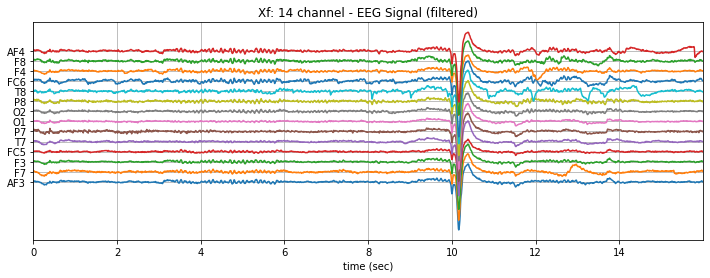

In [7]:
t = np.arange(Xf.shape[0])/fs
plt.figure(figsize=(12,4))
plt.plot(t,Xf+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf: 14 channel - EEG Signal (filtered)')
plt.show()

# ICA Based -  Artifact Removal Algorithm

In [8]:
sp.eeg.ICA_filtering

<function eeg.artifact_correction.ICA_filtering(X, winsize=128, ICA_method='extended-infomax', kur_thr=2, corr_thr=0.8, AF_ch_index=[0, 13], F_ch_index=[1, 2, 11, 12], verbose=True, window=['hamming', True], hopesize=None, winMeth='custom')>

In [9]:
XR = sp.eeg.ICA_filtering(Xf.copy(),verbose=1,winsize=128)
XR.shape

ICA Artifact Removal : extended-infomax
100.05%|##################################################|2112\2113|
Done..


(2048, 14)

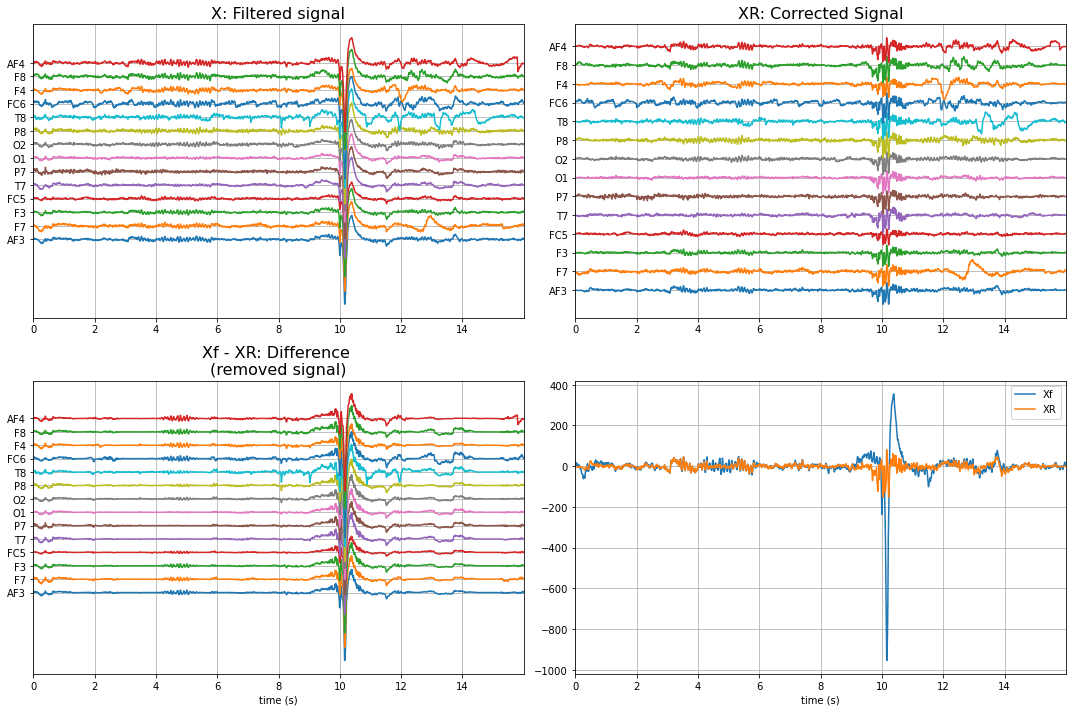

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(t,Xf+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
#plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('X: Filtered signal',fontsize=16)
plt.subplot(222)
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
#plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal',fontsize=16)
#plt.show()
#plt.figure(figsize=(12,5))
plt.subplot(223)
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference \n(removed signal)',fontsize=16)
# #plt.show()
plt.subplot(224)
plt.plot(t,Xf[:,0],label='Xf')
plt.plot(t,XR[:,0],label='XR')
#plt.plot(t,Xf[:,0]-XR[:,0])
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
Xf.shape, XR.shape

((2048, 14), (2048, 14))

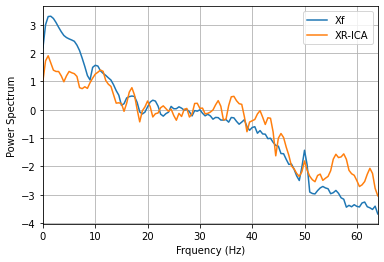

In [17]:
Pr1 = sp.Periodogram(Xf[:,0])
Pr2 = sp.Periodogram(XR[:,0])
frq = (fs/2)*np.arange(len(Pr1))/(len(Pr1)-1)

plt.plot(frq, np.log10(Pr1),label='Xf')
plt.plot(frq, np.log10(Pr2),label='XR-ICA')
plt.legend()
plt.grid()
plt.xlim([0,frq[-1]])
plt.ylabel('Power Spectrum')
plt.xlabel('Frquency (Hz)')
plt.show()

# ATAR Algorithm -  Artifact removal algorthm

In [12]:
sp.eeg.ATAR

<function eeg.atar_algorithm.ATAR(X, wv='db3', winsize=128, thr_method='ipr', IPR=[25, 75], beta=0.1, k1=10, k2=100, est_wmax=100, theta_a=inf, bf=2, gf=0.8, OptMode='soft', wpd_mode='symmetric', wpd_maxlevel=None, factor=1.0, verbose=False, window=['hamming', True], hopesize=None, ReconMethod='custom', packetwise=False, WPD=True, lvl=[], fs=128.0, use_joblib=False)>

## Soft-thresholding

In [13]:
XR1 = sp.eeg.ATAR(Xf.copy(),wv='db4', winsize=128, beta=0.1,thr_method='ipr',OptMode='soft', verbose=1)

WPD Artifact Removal
WPD: True  Wavelet: db4 , Method: ipr , OptMode: soft
IPR= [25, 75] , Beta: 0.1 , [k1,k2]= [10, 100]
Reconstruction Method: custom , Window: ['hamming', True] , (Win,Overlap)= (128, 64)


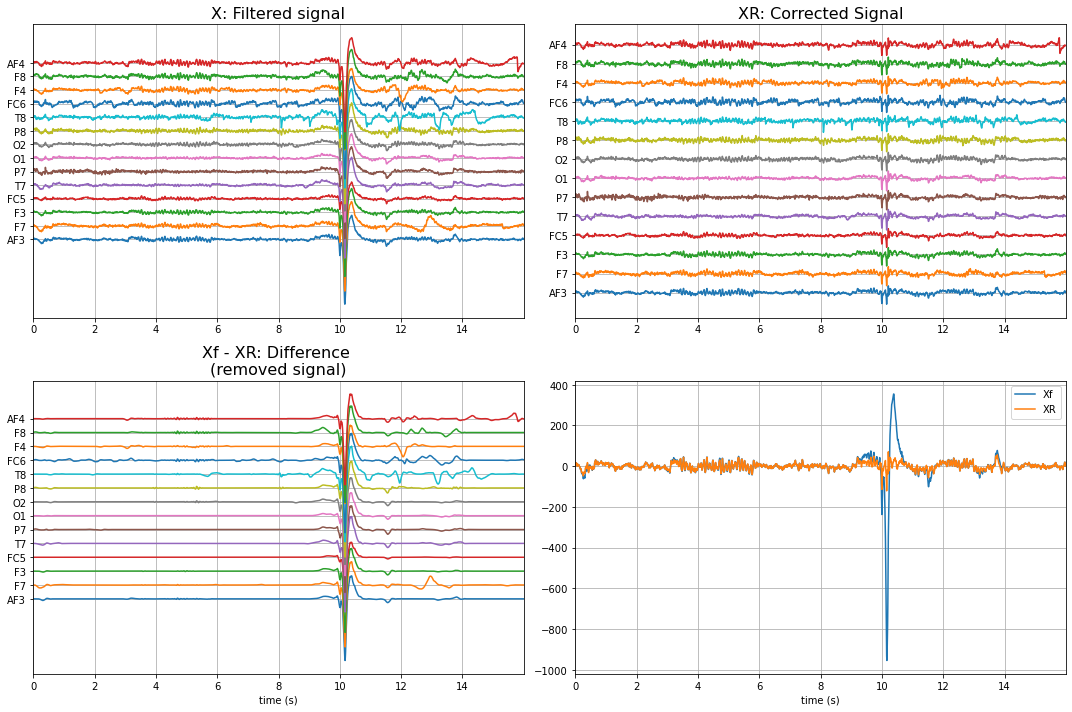

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(t,Xf+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
#plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('X: Filtered signal',fontsize=16)
plt.subplot(222)
plt.plot(t,XR1+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
#plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal',fontsize=16)
#plt.show()
#plt.figure(figsize=(12,5))
plt.subplot(223)
plt.plot(t,(Xf-XR1)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference \n(removed signal)',fontsize=16)
# #plt.show()
plt.subplot(224)
plt.plot(t,Xf[:,0],label='Xf')
plt.plot(t,XR1[:,0],label='XR')
#plt.plot(t,Xf[:,0]-XR[:,0])
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

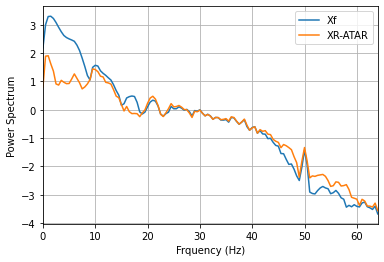

In [16]:
Pr1 = sp.Periodogram(Xf[:,0])
Pr2 = sp.Periodogram(XR1[:,0])
frq = (fs/2)*np.arange(len(Pr1))/(len(Pr1)-1)

plt.plot(frq, np.log10(Pr1),label='Xf')
plt.plot(frq, np.log10(Pr2),label='XR-ATAR')
plt.legend()
plt.grid()
plt.xlim([0,frq[-1]])
plt.ylabel('Power Spectrum')
plt.xlabel('Frquency (Hz)')
plt.show()

## Elimination Mode

In [18]:
XR2 = sp.eeg.ATAR(Xf.copy(),wv='db4', winsize=128, beta=0.01,thr_method='ipr',OptMode='elim', IPR=[25, 75],verbose=1)

WPD Artifact Removal
WPD: True  Wavelet: db4 , Method: ipr , OptMode: elim
IPR= [25, 75] , Beta: 0.01 , [k1,k2]= [10, 100]
Reconstruction Method: custom , Window: ['hamming', True] , (Win,Overlap)= (128, 64)


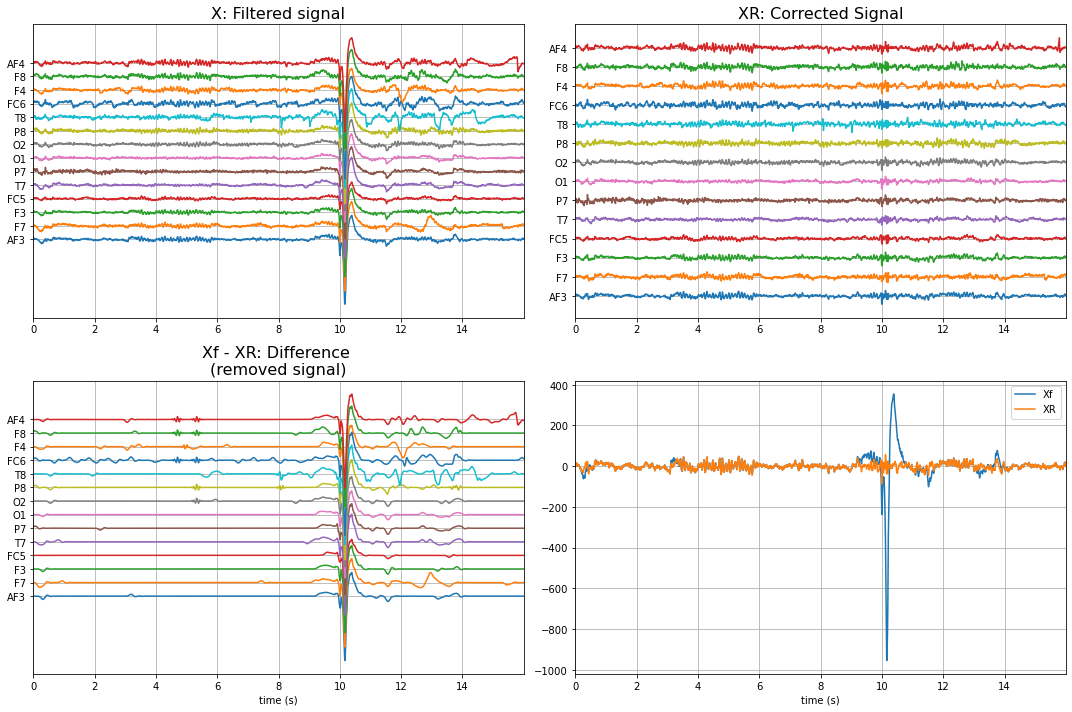

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(t,Xf+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
#plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('X: Filtered signal',fontsize=16)
plt.subplot(222)
plt.plot(t,XR2+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
#plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal',fontsize=16)
#plt.show()
#plt.figure(figsize=(12,5))
plt.subplot(223)
plt.plot(t,(Xf-XR2)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference \n(removed signal)',fontsize=16)
# #plt.show()
plt.subplot(224)
plt.plot(t,Xf[:,0],label='Xf')
plt.plot(t,XR2[:,0],label='XR')
#plt.plot(t,Xf[:,0]-XR[:,0])
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

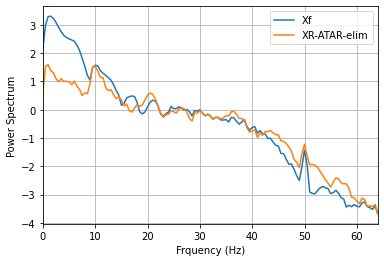

In [20]:
Pr1 = sp.Periodogram(Xf[:,0])
Pr2 = sp.Periodogram(XR2[:,0])
frq = (fs/2)*np.arange(len(Pr1))/(len(Pr1)-1)

plt.plot(frq, np.log10(Pr1),label='Xf')
plt.plot(frq, np.log10(Pr2),label='XR-ATAR-elim')
plt.legend()
plt.grid()
plt.xlim([0,frq[-1]])
plt.ylabel('Power Spectrum')
plt.xlabel('Frquency (Hz)')
plt.show()

# Comparision

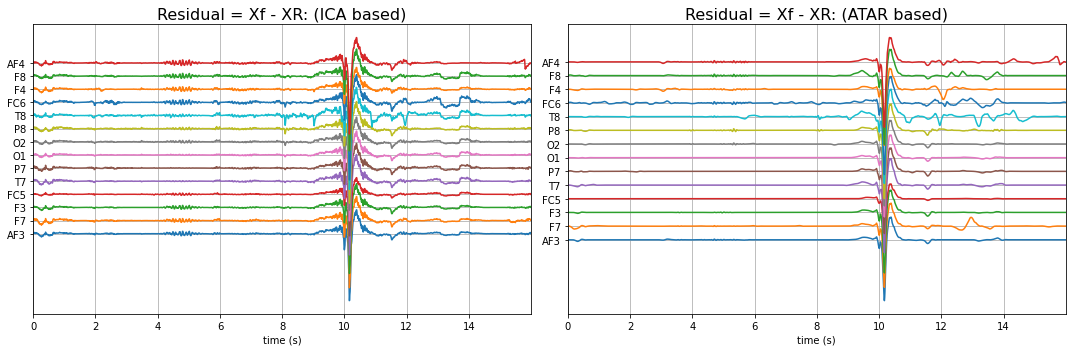

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Residual = Xf - XR: (ICA based)',fontsize=16)
# #plt.show()
plt.subplot(122)
plt.plot(t,(Xf-XR1)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Residual = Xf - XR: (ATAR based)',fontsize=16)
#plt.legend()
plt.tight_layout()
plt.show()

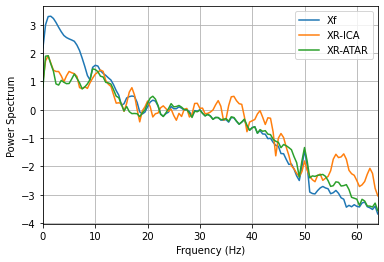

In [23]:
Pr1 = sp.Periodogram(Xf[:,0])
Pr2 = sp.Periodogram(XR[:,0])
Pr3 = sp.Periodogram(XR1[:,0])
plt.plot(frq, np.log10(Pr1),label='Xf')
plt.plot(frq, np.log10(Pr2),label='XR-ICA')
plt.plot(frq, np.log10(Pr3),label='XR-ATAR')
plt.legend()
plt.grid()
plt.xlim([0,frq[-1]])
plt.ylabel('Power Spectrum')
plt.xlabel('Frquency (Hz)')
plt.show()